# Imports

In [2]:
# Some useful modules for notebooks
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Test if the package is installed correctly
# from emfit import print_version
from matplotlib import pyplot as plt
import numpy as np
from mlpynem.dataset import DatasetPinem, TestPinem, normalize_spectra
# output directory


# Build a dataset

## Set the parameters of the simulation

In [6]:
# Energy scale
x = np.linspace(-20,20,1024) # Here I recommend 1024 instaed of 1000
# Amplitude of the spectra, governs the signal to noise ratio
amplitude = 10
# Type of kernel, it can be 'Gaussian', 'Voigt' or a 1-D array
kernel = 'Gaussian'
# Cutoff of the subbands (how many subbands are computed)
n_cutoff = 50
# Background (Flat noise) level in percent of the amplitude
background = 0.1
# Number of spectra to simulate
n = 64*1024
# Random seed
seed = 42

# parameter boundaries. The order in which they are sorted is : g, rt, fwhm, omega, offset
# Lower bounds, should all be smaller than the upper bounds
lb = np.array([0.001,0.7,0.5,0.8,-2.0])
# Upper bounds, should all be larger than the lower bounds
ub = np.array([3.0,0.7,1.2,2.0,2.0])

## Create the spectra

/!\ This might take a while /!\

In [5]:
dataset = DatasetPinem(x=x,
                       amplitude=amplitude, 
                       kernel=kernel, 
                       lower_bound=lb,
                       upper_bound=ub,
                       n=n,
                       seed = seed,
                       n_cutoff=n_cutoff,
                       background=background)

0it [00:00, ?it/s]

64it [00:00, 67.78it/s]


## Plot a dataset item

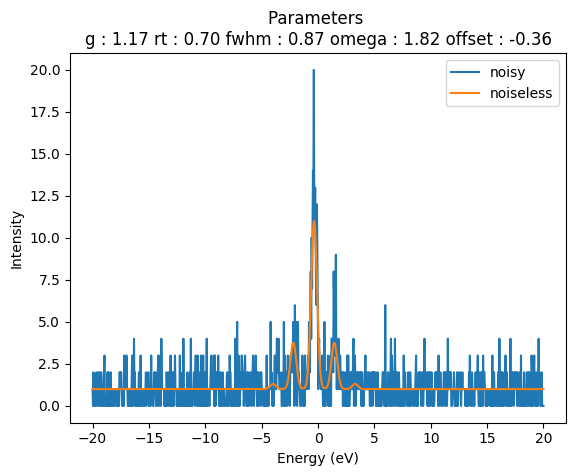

In [13]:
rand = np.random.randint(n)

plt.plot(dataset.p.x, dataset.noisy_spectres[rand], label = 'noisy')
plt.plot(dataset.p.x, dataset.noiseless_spectres[rand], label = 'noiseless')
plt.ylabel('Intensity')
plt.xlabel('Energy (eV)')
plt.title('Parameters \ng : {:.2f} rt : {:.2f} fwhm : {:.2f} omega : {:.2f} offset : {:.2f}'.format(*dataset.xs[rand]))
plt.legend()

## Save the dataset

In [3]:
save_name = 'pinem_amp{}_bkgd{}_nort_seed{}.npz'.format(amplitude, background,dataset.seed)

In [8]:
dataset.save_model('./datasets/' + save_name)

# Build a test dataset

In [9]:
# Note : I should replace the bounds by dictionaries to make things more robust.

test_model = np.load('./datasets/' + save_name)
lower_bound = test_model['bounds']['lower_bound']
upper_bound = test_model['bounds']['upper_bound']
omega = (lower_bound[3] + upper_bound[3])/2
fwhm = (lower_bound[2] + upper_bound[2])/2
offs = np.linspace(lower_bound[4], upper_bound[4], 50)
gs = np.linspace(lower_bound[0]+0.001, upper_bound[0], 50)
rts = (lower_bound[1] + upper_bound[1])/2

params_dict = {'omega':[omega], 'fwhm':[fwhm], 'offset':offs, 'g':gs, 'rt':[rts]}

save_folder = './datasets/test_model_{}'.format(save_name)

tp = TestPinem(dataset_file='./datasets/' + save_name, params_dict=params_dict, n = 50, true_coords_keys=['g'] )

tp.generate_data()

tp.save_data(save_folder)

2500it [00:33, 74.31it/s]

Data saved in ./datasets/test_model_pinem_amp10_bkgd0.1_nort_seed42.npz
